# Statistics of Streakiness

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let us assume that you always hit a shot at a certain percentage p and that the probability of hitting the shot does not depend on the history of hits and misses

In [4]:
sample = np.random.binomial(p=0.5,n=1,size=10)
print(sample)

[1 1 0 0 0 0 0 1 1 0]


Let us now analyze this data for streakiness.  How often do we find 2 1s in row? How often do we find 3 1's in a row.

In [7]:
def streakiness(data):
    ones = np.zeros(len(data))
    zeros = np.zeros(len(data))
    state = data[0]
    streak = 1
    for d in data[1:]:
        if d!=state:
            if state == 1:
                ones[streak-1]+=1
            else:
                zeros[streak-1]+=1
            streak = 1
            state = d
        else:
            streak+=1
    return ones,zeros

In [35]:
length = 1000000
ones,zeros = streakiness(np.random.binomial(p=0.5,n=1,size=length))
ones_n = ones/length
zeros_n = zeros/length
x = np.arange(1,len(ones)+1)

<Container object of 10 artists>

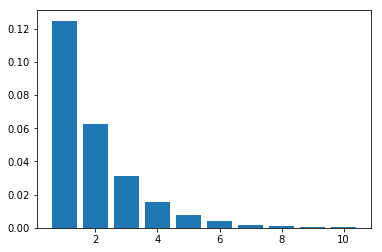

In [36]:
plt.bar(x[:10],ones_n[:10])

In [37]:
print(ones_n[:10])

[ 0.124851  0.062574  0.031092  0.015736  0.007777  0.003883  0.001981
  0.000972  0.000487  0.000257]


lets compare that to the probabilities that we expect from probability theory:
To find a streak of 4 1s we need a 011110 that occurs with a probability of p**4*(1-p)**2

In [40]:
p=0.5
t_ones = [p**i*(1-p)**2 for i in range(1,15)]
print(t_ones)

[0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05]


Stephen Curry shot 1585 times in the 2016-2017 season and hit approximately 50% of his shots

In [41]:
print(np.array(t_ones) * 1585)

[  1.98125000e+02   9.90625000e+01   4.95312500e+01   2.47656250e+01
   1.23828125e+01   6.19140625e+00   3.09570312e+00   1.54785156e+00
   7.73925781e-01   3.86962891e-01   1.93481445e-01   9.67407227e-02
   4.83703613e-02   2.41851807e-02]
